### Description:
------------
This file decomposes the vector magnetic field fluctuations onto the
vector background magnetic field using the undecimated discrete wavelet
decomposition. The scale-by-scale 'details' and 'approximations' provide
the scale-by-scale fluctuations and background field, respectively. This
type of anisotropy study is historically called 'variance anisotropy'.
This is basically the anisotropy study of magnetic field quantities
rather than the wavevector 'k_i' values that it depends upon.

The following quantities are estimated:

* the power spectral density parallel and perpendicular to the background
magnetic field estimated at scales that are distributed on a dyadic grid
2^n:{1 ... m};

* the ratio of the parallel and perpendicular power spectral densities;

* the structure functions and resulting exponents of the fluctuations
parallel and perpendicular to the background magnetic field estimated at 
scales that are distributed on a dyadic grid 2^n:{1 ... m};

* the probablity density functions for the fluctuations parallel and 
perpendicular to the background magnetic field estimated at scales that 
are distributed on a dyadic grid 2^n:{1 ... m}.



**************************************************************************

Additional Notes:
-----------------
Remember that when you are calculating structure functions you will have
to normalise the coefficients by 'square root of the scale' you are 
looking at. This is because the wavelets coefficients are normalised 
w.r.t. this factor due to the L^2 Norm. This does not effect calculation 
of the power as the power is related to the L^2 norm.

Example code to plot structure functions:
plot(log10(scale),log10((p./(scale))./(2*dt)),'.r')


**************************************************************************

# Import packages

In [1]:
""" Numpy """
import numpy as np

"""Pandas"""
import pandas as pd

"""Matplotlib"""
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
import matplotlib.units as munits
import matplotlib.ticker
from   cycler import cycler
import datetime

"""Seaborn"""
import seaborn as sns

""" Wavelets """
import pywt

""" Scipy """
import scipy.io
from scipy.io import savemat

""" Load files """
from   spacepy import pycdf
import pickle
import glob
import os


""" Import manual functions """
import sys

sys.path.insert(1,r'C:\Users\nikos.000\PVI\python_scripts')
import functions2 as fun

sys.path.insert(1,r'C:\Users\nikos.000\UDWT\python')
import udwt_final as udwtf


""" Beatiful plots """
udwtf.plot_pretty(dpi=150, fontsize=12)
plt.style.use(['science','notebook','grid'])


""" SET fontsize """
font_size       = 15
font_size_ticks = font_size -2

C:\Users\nokni\pyspedas\lib\site-packages\spacepy\time.py:2294: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


## Split FIELDS and SPC data into 1 hour intervals:
**Note: Outliers from SPC data have been removed using the hampel filter**

In [ ]:
### Input parameters ###
year       = ['2018', '2019','2020','2021']
res_sec    = '1s'
time       = np.linspace(0,3600,3600).astype(int)

udwtf.split_data(year, res_sec, time)

# Run functions

In [9]:
norm_T_F         = False     # If True, transform is normalized so that 
                             # the energy of the coefficients will be equal to the energy of data.
                             # In other words, np.linalg.norm(data.ravel()) will equal the norm of 
                             # the concatenated transform coefficients when trim_approx is True

hmany            = 10        # How many files at a time#
start_point      = 5         # Starting  point for file names#
dt               = 1         # dt sampling of our timeseries#
edge_eff         = 0         # Remove edge effects?#
wname            ='coif2'    # Wavelet name#
Lps              = 7;        # Low pass filter phase shift for level 1 Coiflet2#
Hps              = 4;        # High pass filter phase shift for level 1 Coiflet2 # 
anglebins        = [0,20, 
                    70,90]   # Agle bin edges, careful here might need change#
qorder           = [1, 2, 3,
                    4, 5, 6] # For structure functions#
alternative_comp = False            # Ususaly no#

x0               = 2.8*1e-3  # Start of fit in HZ# 
xf               = 1*1e-1    # End of fit in HZ# 
Magnitude        = False
year             = ['2018'
                    ,'2019'
                    ,'2020'
                    ,'2021']


for ii in range(len(year)):
    if   ii   ==0:
        month = ['11', '12']
    elif ii   == 1:
        month = ['03','04','08','09']
    elif   ii ==2:
        month = ['01','02','05', '06','08','09','10']
    elif ii   ==3: 
        month = ['01','02''03','04','05', '06','07','08']
        
    for kk in range(len(month)):
          
        """ 1st function: Load clean magnetic field and particle data divided into hmany hour intervals  """
        file_names_B, file_names_V, file_names_D = udwtf.get_file_names(ii, kk, year, month)
        
        for jj in range(start_point, len(file_names_B), hmany):

            
            """ 2nd function """
            Btotal, Vtotal         = udwtf.load_data(file_names_B, file_names_V, file_names_D, jj, hmany)
            
            """ 3rd function """
            Apr, Swd, pads, nlevel = udwtf.UDWT(Btotal, wname, Lps, Hps, edge_eff, norm_T_F)
            
            """ 4th function """
            coefsBtotMag, coefspar, coefsperpA, coefsperpB, coefsperpMag, coefsBVangle = udwtf.project_2_Vsw(Apr, Swd, nlevel, pads, wname, Vtotal)

            quant  = coefsBVangle['0']
            quant1 = len(quant[ (quant<20) | (quant>160)])/len(quant)
            quant2 = len(quant[ (quant<90) | (quant>70)])/len(quant)
            if (quant1> 0.05) or (quant2> 0.05) :
                """ 5th function """
                angleindices, absize, lengthofsamples  = udwtf.function_4(coefsBtotMag,coefspar, coefsperpA, coefsperpB, coefsperpMag, coefsBVangle, anglebins, nlevel)

                """6th function"""
                p_Bmag_order, scale, frequency ,p_BtotMag, dp_BtotMag, p_par_order, dp_par, p_perpA,dp_perpA, p_perpB, dp_perpB, p_perpMag_order, dp_perpMag, magcom, dmagcom = udwtf.get_quants_2_plot(nlevel, qorder, alternative_comp, wname, dt, absize, angleindices, coefsBtotMag, coefspar,coefsperpA, coefsperpB,coefsperpMag)

                frequency = np.sort(frequency)

                fld = {'f':np.sort(frequency), 'par':p_par_order, 'perp':p_perpMag_order , 
                       'Bmag_par_perp':p_Bmag_order , 'Vsw':np.nanmean(Vtotal[1]),
                       'd': np.mean(Vtotal[-1]), 'magcom':magcom}
               # print('good')
                file_to_store = open(r"C:\Users\nikos.000\UDWT\files\last_try\_"+year[ii]+"\_"+year[ii]+'_'+month[kk]+'_'+str(jj)+".dat", "wb") # sto trito bale 2 opws einai twra
                pickle.dump(fld, file_to_store)
                file_to_store.close()
            else:
                print('bad')

bad
bad
bad
bad


#### $Apply \  P-law  \ fit \ on \  each \ curve$

In [43]:
"""Specify starting point """
start_point =0

"""Specify start of fot in Hz """
x0   = 1*1e-3 

"""Specify end of fit in Hz """
xf   = 8*1e-2 

year = ['2018', '2019', '2020', '2021']
for ii in range(len(year)):
    target_path_B = r'C:\Users\nikos.000\UDWT\files\last_try\_'+str(year[ii]) 
    file_names_B  = glob.glob(target_path_B+os.sep+'*.dat') 
    file_names_B  = natsort.natsorted(file_names_B)          

    for k in range(start_point,len(file_names_B)):
           
        file_to_read = open(file_names_B[k], "rb")
        B1           = pickle.load(file_to_read)
        file_to_read.close()
        plaw_par = []
        plaw_per = []
        for o in range(2):
            for i in range(len(qorder)):
                if o==0:
                    """ PSD of Bmag when 0 < Θvb < 20  """
                    x   = B1['f']
                    y   = B1['Bmag_par_perp']['qorder_'+str(qorder[i])].T[0][1:]
                    x   = np.array(x[y>0])
                    y   = np.array(y[y>0])
                else:
                    """ PSD of Bmag when 70 < Θvb <90  """
                    x   = B1['f']
                    y   = B1['Bmag_par_perp']['qorder_'+str(qorder[i])].T[1][1:]
                    x   = np.array(x[y>0])
                    y   = np.array(y[y>0])

                ### fit on qth order moment
                if (len(y)>0):
                    s   = np.where(x == x.flat[np.abs(x - x0).argmin()])[0][0]
                    e   = np.where(x  == x.flat[np.abs(x - xf).argmin()])[0][0]
                    if (len(y[s:e])>1):
                        fit = fun.curve_fit_log(x[s:e],y[s:e])
                        if o==0:
                            plaw_par.append(fit[0][1])
                        else:
                            plaw_per.append(fit[0][1])

                    else:
                        if o==0:
                            plaw_par.append(-100)
                        else:
                            plaw_per.append(-100)
                else:
                    if o==0:
                        plaw_par.append(-100)
                    else:
                        plaw_per.append(-100)
        
        ratio = list(B1['Bmag_par_perp']['qorder_2'].T[0][1:]/B1['Bmag_par_perp']['qorder_2'].T[1][1:])
        
        fld ={'par':plaw_par,
              'per':plaw_per,
              'Vsw':B1['Vsw'],
              'd': B1['d'],
              'ratio':ratio}
        
        file_to_store = open(r"C:\Users\nikos.000\UDWT\files\last_try\plaw_fits\_"+year[ii]+"\_"+str(k)+".dat", "wb") # sto trito bale 2 opws einai twra
        pickle.dump(fld, file_to_store)
        file_to_store.close()

# Create df's containing p-law index 

In [66]:
import natsort
year =np.array(['2018', '2019', '2020', '2021'])

for kk in range(len(year)):
    target_path_B = r'C:\Users\nikos.000\UDWT\files\last_try\plaw_fits\_'+str(year[kk]) ##r'C:\Users\nikos.000\huang_tranform\files\final\_2019'  #path file
    file_names_B1 = glob.glob(target_path_B+os.sep+'*.dat') 
    file_names_B1 = natsort.natsorted(file_names_B1)
    if kk==0:
        file_names_B = file_names_B1
    else:
        file_names_B = file_names_B + file_names_B1



par_a =[]; perp_a = []; dist = []; Vsw = []

spar1  = []; spar2  = []; spar3  = []; spar4  = []; spar5  = []; spar6  = [];
sperp1 = []; sperp2 = []; sperp3 = []; sperp4 = []; sperp5 = []; sperp6 = [];
ratio1 = []; ratiof =[];  ratiod =[];

sf_per =[]; sf_par =[]; sf_q = []; sf_d = [];
qorder =[1,2,3,4,5,6]

for i in range(len(file_names_B)):
    file_to_read = open(file_names_B[i], "rb")
    B = pickle.load(file_to_read)
    file_to_read.close()

    if np.shape(list(B))[0] >0:
        if np.size(list(B['par']))>1:
            dist.append(np.ones(len(qorder))*B['d'])
            Vsw.append(np.ones(len(qorder))*B['Vsw'])
            for j in range(1,len(qorder)+1):
                if j==1:
                    spar1.append(B['par'][0])
                    sperp1.append(B['per'][0])
                    
                elif j==2:
                    spar2.append(B['par'][1])
                    sperp2.append(B['per'][1])

                    ratio1  =ratio1 + B['ratio']
                    ratiof = ratiof + list(B1['f'])
                    ratiod = ratiod + list(np.ones(len(B['ratio']))*B['d'])
   
                elif j==3:
                    spar3.append(B['par'][2])
                    sperp3.append(B['per'][2])
                elif j==4:
                    spar4.append(B['par'][3])
                    sperp4.append(B['per'][3])
                elif j==5:
                    spar5.append(B['par'][4])
                    sperp5.append(B['per'][4])
                elif j==6:
                    spar6.append(B['par'][5])
                    sperp6.append(B['per'][5])
        
d =[]
v = []
for k in range(len(dist)):
    d.append(dist[k][0])
    v.append(Vsw[k][0])

df_perp =pd.DataFrame({'1':sperp1,
                     '2':sperp2,
                     '3':sperp3,
                     '4':sperp4,
                     '5':sperp5,
                     '6':sperp6, 
                     'd':d,
                      'Vsw': v})            

df_par =pd.DataFrame({'1':spar1,
                     '2':spar2,
                     '3':spar3,
                     '4':spar4,
                     '5':spar5,
                     '6':spar6, 
                      'd':d,
                     'Vsw': v})          


# Plot index of PSD for perp and par

C:\Users\nokni\pyspedas\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\nokni\pyspedas\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\nokni\pyspedas\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\nokni\pyspedas\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _meth

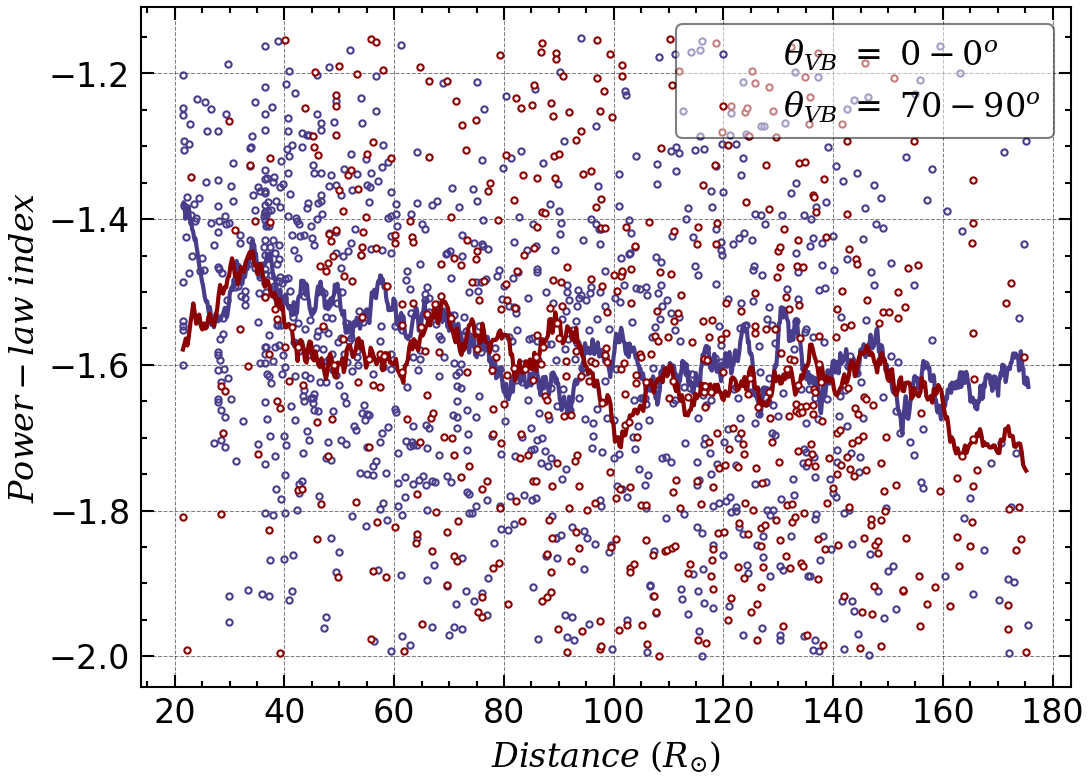

In [219]:
nbins=14
au_to_km = 1.496e8
rsun     = 696340 #km

div_speed =False
if div_speed:
    dist_pa = (np.array(df_pa.d.values)*au_to_km/df_pa.Vsw.values)/3600#/rsun
    dist_pe = (np.array(df_pe.d.values)*au_to_km/df_pe.Vsw.values)/3600#/rsun
    dist_pa =dist_pa[dist_pa<135]
    dist_pe =dist_pe[dist_pe<135]
else:
    dist_pa = np.array(df_pa.d.values)*au_to_km/rsun
    dist_pe = np.array(df_pe.d.values)*au_to_km/rsun  
               
par  = np.array(df_pa['2'].values)#+0.05
perp = np.array(df_pe['2'].values)#+0.05

index_pa = np.argsort(dist_pa).astype('int')
dist_pa  = dist_pa[index_pa]

index_pe = np.argsort(dist_pe).astype('int')
dist_pe  = dist_pe[index_pe]

par   = par[index_pa]
perp  = perp[index_pe]

def run_mean_two(X1, Y1, nbins):
    bins = np.linspace(min(X1),max(X1),nbins)

    xx = bins[:-1] + (0.5) * (bins[1:] - bins[:-1])

    idx1  = np.digitize(X1,bins);                                 
    running_mean1 = [np.median(Y1[idx1==k]) for k in range(nbins)]; 
    running_stdv1 = [np.std(Y1[idx1==k]) for k in range(nbins)];  
    points1 = [len(Y1[idx1==k]) for k in range(nbins)];           

    return xx,running_mean1,running_stdv1/np.sqrt(points1)

def moving_average(a, b, n) :
    retx = np.cumsum(a, dtype=float)
    retx[n:] = retx[n:] - retx[:-n]
    rety = np.cumsum(b, dtype=float)
    rety[n:] = rety[n:] - rety[:-n]
    return retx[n - 1:] / n,rety[n - 1:] / n




#nbins=10
plt.plot(dist_pa[(par<-1.15) & (par>-2)],par[(par<-1.15) & (par>-2)],'o',ms=3,mfc='None', c ='darkslateblue', label=r'$\theta_{VB} \ = \ 0-0^{o}$')

#xx,running_mean1 = moving_average(dist[(par<-1.15) & (par>-2)],par[(par<-1.15) & (par>-2)], nbins) #run_mean_two(dist[(par<-1.15) & (par>-2)],par[(par<-1.15) & (par>-2)], nbins)
xx,running_mean1,running_stdv1 = run_mean_two(dist_pa[(par<-1.15)& (par>-2)],par[(par<-1.15) & (par>-2)], nbins)

window_width = 30
cumsum_vec = np.cumsum(np.insert(par[(par<-1.15) & (par>-2)], 0, 0)) 
y011 = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
x111 =np.linspace(min(dist_pa[(par<-1.15)& (par>-2)]), max(dist_pa[(par<-1.15)& (par>-2)]), len(y011))

plt.plot(x111,y011, color='darkslateblue')



cumsum_vec = np.cumsum(np.insert(perp[(perp<-1.15) & (perp>-2)], 0, 0)) 
y012 = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
x112 =np.linspace(min(dist_pe[(perp<-1.15)& (perp>-2)]), max(dist_pe[(perp<-1.15)& (perp>-2)]), len(y012))

plt.plot(x112,y012, color='darkred')
#lightskyblue
plt.plot(dist_pe[(perp<-1.15)& (perp>-2)],perp[(perp<-1.15) & (perp>-2)],'o',ms=3,mfc='white',c ='darkred', label=r'$\theta_{VB} \ = \ 70-90^{o}$')
xx,running_mean1, running_stdv1 = run_mean_two(dist_pe[(perp<-1.15)& (perp>-2)],perp[(perp<-1.15) & (perp>-2)], nbins)


#plt.plot(xx,running_mean1[1:],c= 'darkslateblue' )
#legend = plt.legend(loc="upper right")
plt.legend(frameon=True,loc=0, framealpha=0.5, edgecolor="black")

#legend.get_frame().set_alpha(None)
#legend.get_frame().set_facecolor((0, 0.9, 0.1, 0.04))

plt.ylabel(r'$Power-law  \ index$')
if div_speed:   
    plt.xlabel(r'$Time \ (H)$')   
    
else:
    plt.xlabel(r'$Distance \ (R_{\odot})$')
if div_speed:   
    plt.savefig(r'C:\Users\nikos.000\huang_tranform\figures\eps\_UDWT_evol_spectrum_Time.eps', format='eps',dpi=300,bbox_inches='tight')
    plt.savefig(r'C:\Users\nikos.000\huang_tranform\figures\jpg\_UDWT_evol_spectrum_Time.jpg', format='jpg',dpi=300,bbox_inches='tight')
else:
    plt.savefig(r'C:\Users\nikos.000\huang_tranform\figures\eps\_UDWT_evol_spectrum_distance.eps', format='eps',dpi=300,bbox_inches='tight')
    plt.savefig(r'C:\Users\nikos.000\huang_tranform\figures\jpg\_UDWT_evol_spectrum_distance.jpg', format='jpg',dpi=300,bbox_inches='tight')

C:\Users\nokni\pyspedas\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nokni\pyspedas\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims

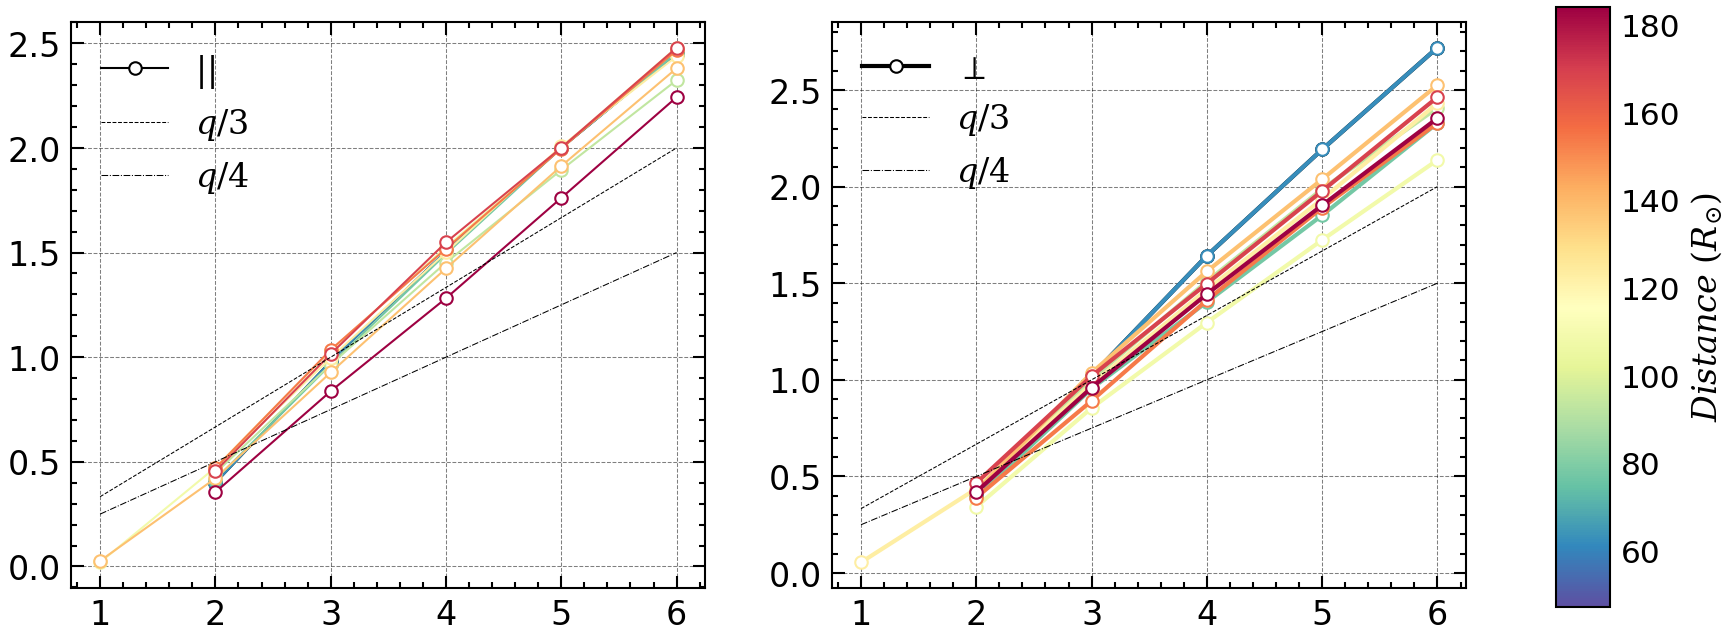

In [263]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import LogNorm  
import matplotlib as mpl

nbins  = 10
short_fit = False

au_to_km = 1.496e8
rsun     = 696340 #km
edges  = np.linspace(min(df_par['d']),max(df_par['d']),nbins)*au_to_km/rsun

qorder = [1, 2, 3, 4, 5, 6]
par, perp    = {}, {}



df_par = df_par[(df_par['2']>-2) & (df_par['2']<-1.1)]
df_perp = df_perp[(df_perp['2']>-2) & (df_perp['2']<-1.1)]



df_par_new  = df_par[ (df_par['2']<-1.1)& (df_par['2']>-2) &  (df_par['1']<0) & (df_par['2']<0) & (df_par['3']<0) & (df_par['4']<0) & (df_par['5']<0) & (df_par['6']<0)]
df_perp_new = df_perp[ (df_perp['2']<-1.1)& (df_perp['2']>-2)  &  (df_perp['1']<0) & (df_perp['2']<0) & (df_perp['3']<0) & (df_perp['4']<0) & (df_perp['5']<0) & (df_perp['6']<0)]

df_perp_new = df_perp_new[(-df_perp_new['1']-1<1) & (-df_perp_new['6']-1 <3)]
df_par_new = df_par_new[(-df_par_new['1']-1<1) & (-df_par_new['6']-1 <3)]


df_perp_new['d'] =df_perp_new['d']*au_to_km/rsun
df_par_new['d'] =df_par_new['d']*au_to_km/rsun
# Remove the middle 40% of the RdBu_r colormap
interval = np.hstack([np.linspace(0, 0.5), np.linspace(0.5, 1)])
colors   = plt.cm.Spectral_r(interval)
cmap     = LinearSegmentedColormap.from_list('name', colors)
col      = cmap(np.linspace(0,1,nbins))


#plot_pretty(dpi=150, fontsize=17)
### create figure ###
fig, ax = plt.subplots(1,2, figsize=(12, 5))

### Add colorbar ###

c      =  0.5*(edges[1:] - edges[:-1])+ edges[1:]#sorted_df.d.values#distances[sort_angle_idx][0:len(angles):h_many]
norm1  = mpl.colors.Normalize(vmin=min(c), vmax=max(c))
cmap   = mpl.cm.ScalarMappable(norm=norm1, cmap=mpl.cm.Spectral_r)
axbox  = ax[1].get_position()
cbaxes = fig.add_axes([0.95, 0.1, 0.03, 0.8])

for i in range(1,len(edges)):
    par1  = []
    perp1 = []
    for k in range(len(qorder)):
        ### for par
        val = -np.array(df_par_new[str(qorder[k])][(df_par_new['d']>edges[i-1]) & (df_par_new['d']<edges[i])])-1
        val = val[val>0]
        par1.append(np.nanmedian( val ))
        ### for perp
        val = -np.array(df_perp_new[str(qorder[k])][(df_perp_new['d']>edges[i-1]) & (df_perp_new['d']<edges[i])])-1
        val = val[val>0]
        perp1.append(np.nanmedian( val ))
    par[str(i)]  = par1
    perp[str(i)] = perp1

for kk in range(1,len(edges)):
    if kk==1:
        ax[0].plot(qorder,par[str(kk)],'-o',mfc='white', lw=1, c ='k', label=r'$\||$')   
        ax[1].plot(qorder,np.array(perp[str(kk)]),'-o',mfc='white', c ='k', label=r'$\perp$')
        ax[0].plot(qorder,par[str(kk)],'-o',mfc='white', lw=1, c =col[kk])#, label=r'$\||$')   
        ax[1].plot(qorder,np.array(perp[str(kk)]),'-o',mfc='white', c =col[kk])#, label=r'$\perp$')
        
    else:
        ax[0].plot(qorder,par[str(kk)],'-o',mfc='white', lw=1, c =col[kk])#, label=r'$\||$')   
        ax[1].plot(qorder,perp[str(kk)],'-o',mfc='white', c =col[kk])#, label=r'$\perp$')        

for kk in range(2):
    f =lambda x: (1/3)*x #-1
    f1 =lambda x: (1/4)*x #-1
    ax[kk]. plot(qorder, f(np.array(qorder)), 'k--',lw=0.5,label =r'$q/3$')
    ax[kk]. plot(qorder, f1(np.array(qorder)), 'k-.',lw=0.5,label =r'$q/4$')

    ax[kk].legend(frameon=False)    

### Colorbar
cbar=plt.colorbar(cmap, cax=cbaxes, orientation='vertical', pad=5)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
#ticklabels = [r'$0.1$',  r'$0.3$',  r'$0.5$',  r'$0.7$', r'$0.9$']
#cbar.set_ticks(np.linspace(min(distances), max(distances), len(ticklabels)))
#cbar.set_ticklabels(ticklabels)
cbar.ax.set_ylabel('$Distance \ (R_{\odot}) $'  )
cbar.ax.tick_params(labelsize=15)

# Some tests

<ipython-input-262-26b630d8c180>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x,y, z_val, cmap='coolwarm', norm=matplotlib.colors.LogNorm(vmin=np.min(z_val[z_val>0]), vmax=np.max(z_val[z_val<10])))


(0.01, 0.35)

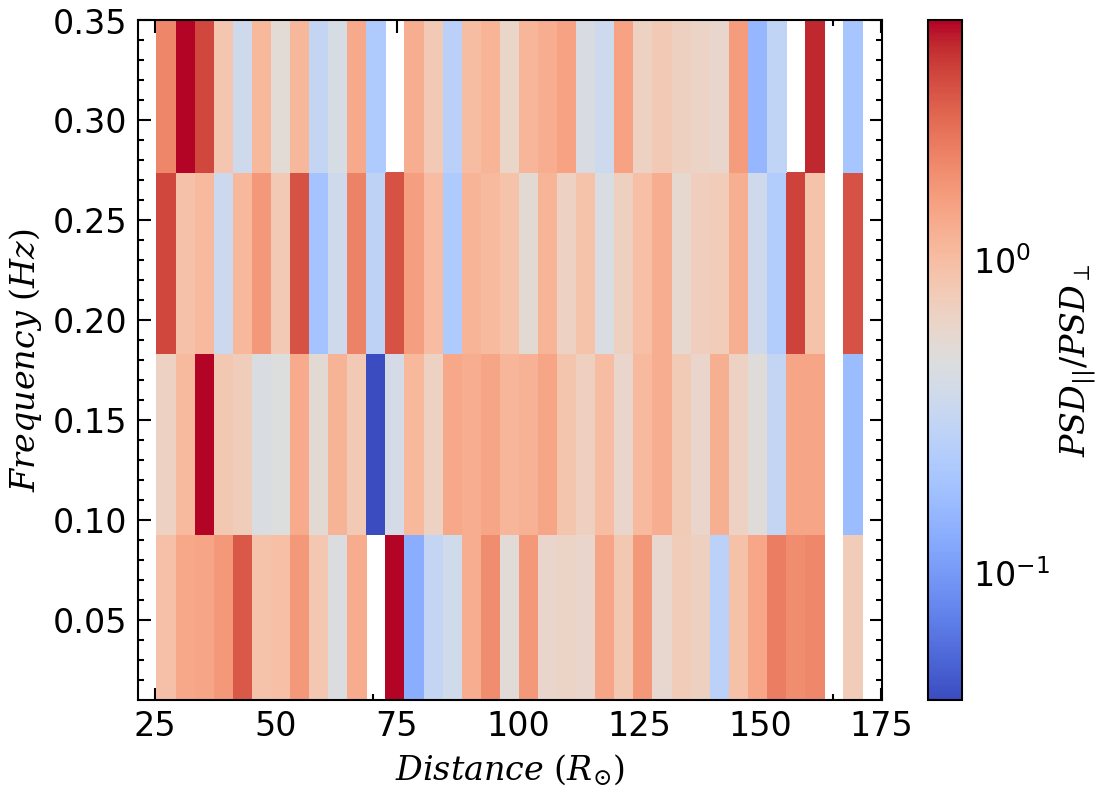

In [262]:
au_to_km = 1.496e8
rsun     = 696340 #km

whatv    = 5
whatvmin = 1e-4
ratiod1 =np.array(ratiod)
ratiof1 =np.array(ratiof)

ratio11 = ratio1[(ratio1>whatvmin)&(ratio1<whatv)]
ratiof1 = ratiof1[(ratio1>whatvmin)&(ratio1<whatv)]
ratiod1 = ratiod1[(ratio1>whatvmin)&(ratio1<whatv)]*au_to_km/rsun 


df_ratio =pd.DataFrame({'r':ratio11,
                       'f':ratiof1,
                       'd':ratiod1})  

bins_d  = np.linspace(min(df_ratio.d.values), max(df_ratio.d.values), 40)
index_d = np.digitize(df_ratio.d.values, bins_d, right=True)

bins_f  = np.linspace(min(df_ratio.f.values), max(df_ratio.f.values), len(np.unique(df_ratio.f.values))-2)
index_f = np.digitize(df_ratio.f.values, bins_f, right=True)


x, y =np.meshgrid(bins_d, bins_f)


value =np.zeros((len(bins_d), len(bins_f)))
ratio11 = np.array(ratio11)
for i in range(len(bins_d)):
    for k in range(len(bins_f)):
        vals = ratio1[np.where((index_f==k) & (index_d==i))[0].astype(int)]
        value[i,k] = np.nanmedian(vals[vals>0] )

fig, ax = plt.subplots()


z_val =  value.T

im = ax.pcolormesh(x,y, z_val, cmap='coolwarm', norm=matplotlib.colors.LogNorm(vmin=np.min(z_val[z_val>0]), vmax=np.max(z_val[z_val<10])))

cbar =fig.colorbar(im, ax=ax)
ax.set_xlabel(r'$Distance \ (R_{\odot})$')
ax.set_ylabel(r'$Frequency \ (Hz)$')
cbar.ax.set_ylabel(r'$ PSD_{||}/PSD_{\perp}$')
#ticklabels = [r'$0.1$',  r'$0.3$',  r'$0.5$',  r'$0.7$', r'$0.9$']
#cbar.set_ticks(np.linspace(min(z_val[z_val>0]), max(z_val[z_val>0]), len(ticklabels)))
#print(max(z_val[z_val>0]))
#cbar.set_ticklabels(ticklabels)
ax.set_ylim([0.01, 0.35])
#plt.yscale('log')